In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Load the dataset

In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [8]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

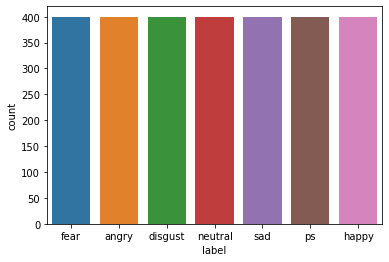

In [9]:
sns.countplot(df['label'])

In [10]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

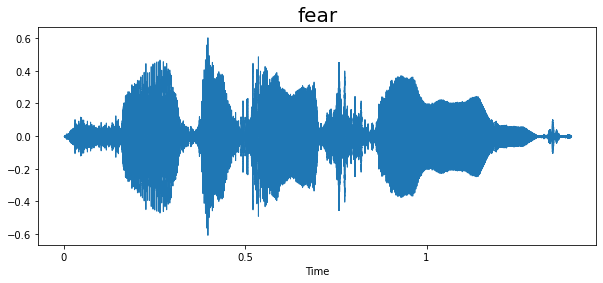

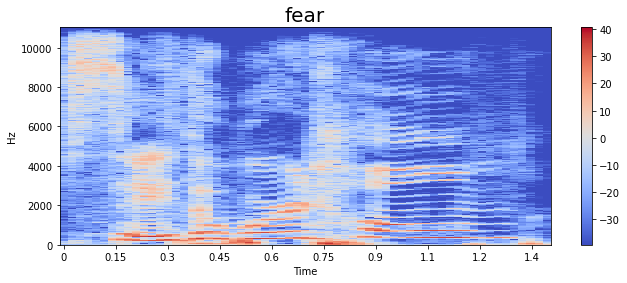

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

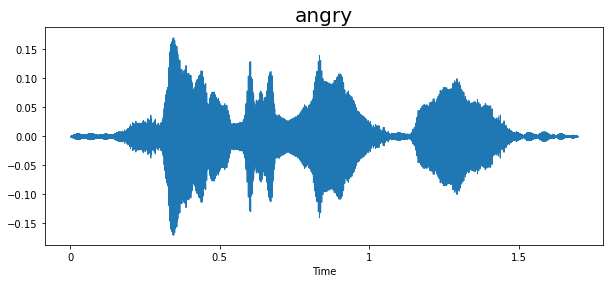

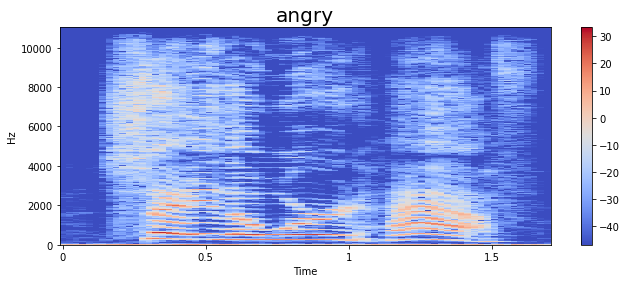

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

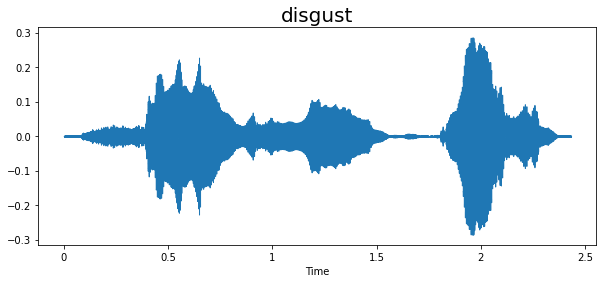

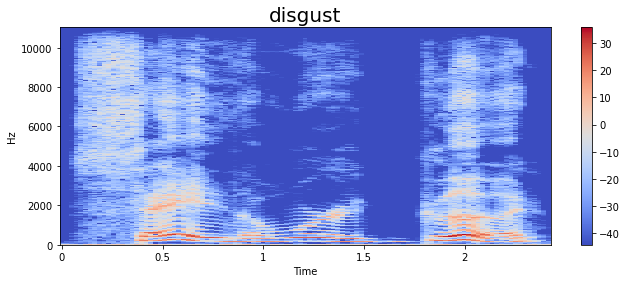

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

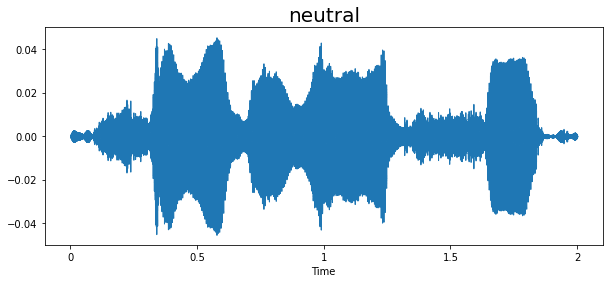

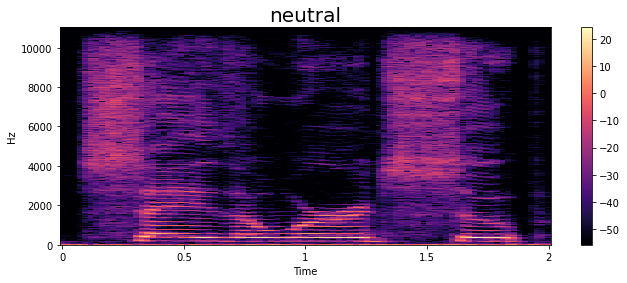

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

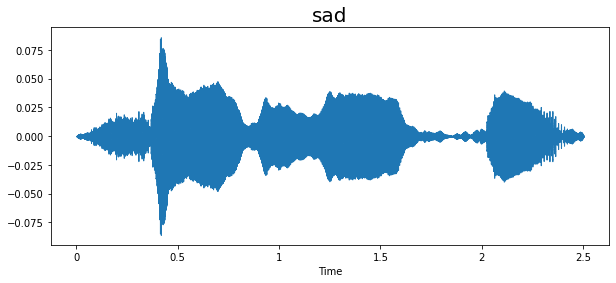

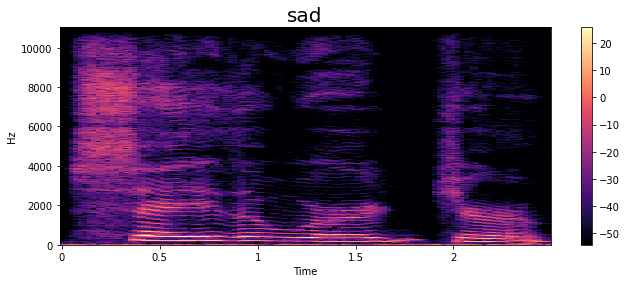

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

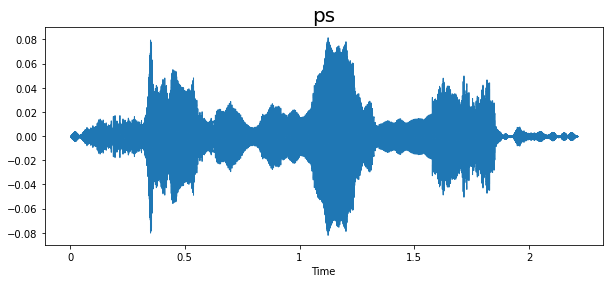

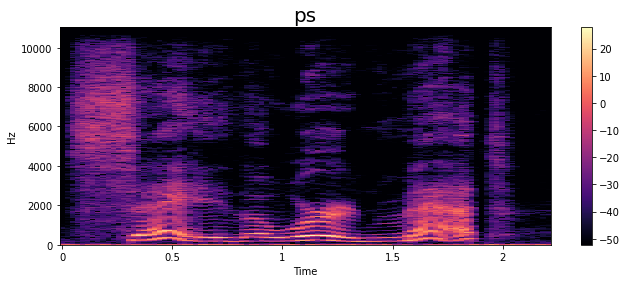

In [16]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

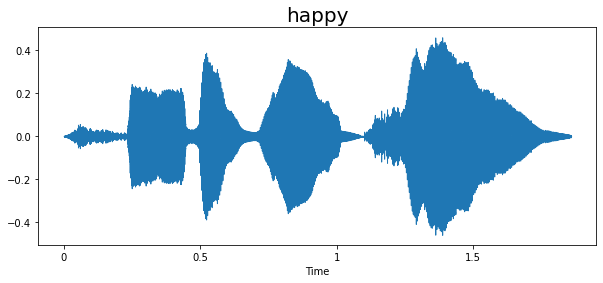

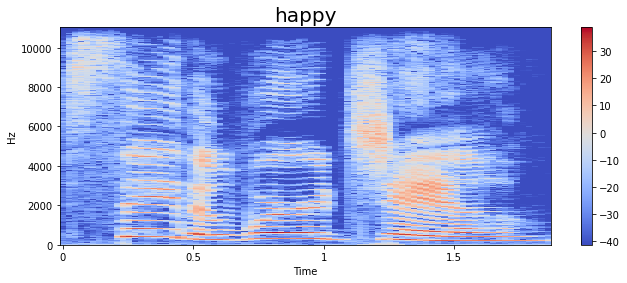

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
    

In [19]:
extract_mfcc(df['speech'][0]) #These are the values which we are going to use for input

array([-286.02704   ,   86.23414   ,   -2.635008  ,   22.56944   ,
        -15.209238  ,   11.531056  ,   11.94983   ,   -2.5640693 ,
          0.63499874,   11.539477  ,  -17.854872  ,   -7.673544  ,
          6.1565223 ,   -3.8004475 ,   -9.552902  ,    3.9220483 ,
        -13.588674  ,   14.449348  ,   19.316969  ,   23.08124   ,
         32.217903  ,   16.650953  ,   -4.138859  ,    1.20185   ,
        -11.535382  ,    6.9179306 ,   -2.8407633 ,   -7.467058  ,
        -11.169154  ,   -2.1890635 ,   -5.489987  ,    4.463149  ,
        -11.367347  ,   -8.866391  ,   -3.8222973 ,    5.0004168 ,
         -1.7143741 ,    2.6642315 ,   11.361882  ,   11.313575  ],
      dtype=float32)

In [20]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
x_mfcc

0       [-286.02704, 86.23414, -2.635008, 22.56944, -1...
1       [-348.74265, 35.7786, -4.4302225, 15.252251, 5...
2       [-340.4982, 54.36257, -14.845929, 21.453777, 8...
3       [-307.126, 21.987495, -5.146962, 7.2266817, -8...
4       [-345.27826, 47.107338, -24.942877, 20.17883, ...
                              ...                        
2795    [-374.88943, 61.58835, -0.7048707, 9.159214, -...
2796    [-314.5199, 40.65166, -6.461393, -3.05994, -51...
2797    [-358.06696, 78.64016, -15.999416, 2.9611573, ...
2798    [-353.46466, 102.15106, -14.645692, -11.564197...
2799    [-389.82825, 54.579174, 0.8075471, -0.8762022,...
Name: speech, Length: 2800, dtype: object

In [22]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
#y = np.expand_dims(y, 1)
y.shape

(2800, 7)

## Create the LSTM Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)), #First Layer
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])
# model.add(LSTM(100, input_shape=(1, 9), return_sequences=True))
# model.add(LSTM(5, input_shape=(1, 9), return_sequences=True))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-07-16 10:35:34.619123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 10:35:34.724500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 10:35:34.725318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 10:35:34.727242: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 77,127
Trainable params: 77,127
Non-trainable params: 0
____________________________________________________

## Train the Model

In [28]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

2022-07-16 10:35:37.982105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-07-16 10:35:40.061864: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


35/35 [==============================] - 4s 23ms/step - loss: 1.4799 - accuracy: 0.4138 - val_loss: 2.6764 - val_accuracy: 0.0875
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.7242 - accuracy: 0.7393 - val_loss: 2.6041 - val_accuracy: 0.0268
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4189 - accuracy: 0.8558 - val_loss: 2.0542 - val_accuracy: 0.2357
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.9107 - val_loss: 2.4600 - val_accuracy: 0.2071
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.2064 - accuracy: 0.9411 - val_loss: 2.1298 - val_accuracy: 0.2857
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.9545 - val_loss: 3.1856 - val_accuracy: 0.2500
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 0.9504 - val_loss: 2.8323 - val_accuracy: 0.3929
Epoch 8/50
35/35 [============

##Plot the results

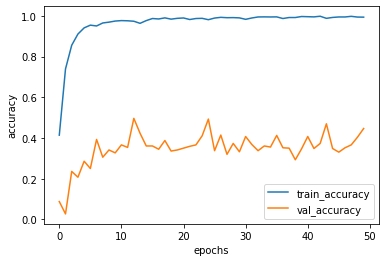

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

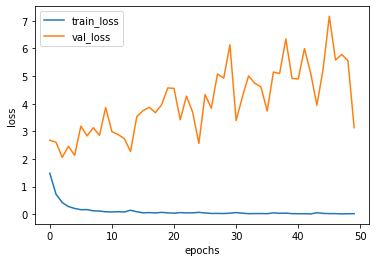

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()